In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv


In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv')
print(df.shape)
print(df.info())
df.head()

(700, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


### **Data Preparation**

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
# 1. one-Hot encoding for device model 

df = pd.get_dummies(df, columns=['Device Model'], prefix='Device', drop_first=True, dtype='int')

In [5]:
df.drop('User ID', axis=1, inplace=True)
df.head()

,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Device_OnePlus 9,Device_Samsung Galaxy S21,Device_Xiaomi Mi 11,Device_iPhone 12
0,Android,393,6.4,1872,67,1122,40,Male,4,0,0,0,0
1,Android,268,4.7,1331,42,944,47,Female,3,1,0,0,0
2,Android,154,4.0,761,32,322,42,Male,2,0,0,1,0
3,Android,239,4.8,1676,56,871,20,Male,3,0,0,0,0
4,iOS,187,4.3,1367,58,988,31,Female,3,0,0,0,1


In [6]:
# Step 1: Split the data into training and test sets
X = df.drop('User Behavior Class', axis=1)  
y = df['User Behavior Class'] 

In [7]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Label Encoding for Operating System 
label_encoder_os = LabelEncoder()
X_train['Operating System'] = label_encoder_os.fit_transform(X_train['Operating System'])
X_test['Operating System'] = label_encoder_os.transform(X_test['Operating System'])

In [9]:
# Binary Encoding for Gender
label_encoder_gender = LabelEncoder()
X_train['Gender'] = label_encoder_gender.fit_transform(X_train['Gender'])
X_test['Gender'] = label_encoder_gender.transform(X_test['Gender'])

In [10]:
# Standardizing Numerical Features
scaler = StandardScaler()
numerical_features = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                      'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)']

In [11]:
# Fit scaler on training data, then transform both training and test data
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Check for missing values
print("Missing values in training set:\n", X_train.isnull().sum())
print("Missing values in test set:\n", X_test.isnull().sum())

Missing values in training set:
 Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
Device_OnePlus 9              0
Device_Samsung Galaxy S21     0
Device_Xiaomi Mi 11           0
Device_iPhone 12              0
dtype: int64
Missing values in test set:
 Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
Device_OnePlus 9              0
Device_Samsung Galaxy S21     0
Device_Xiaomi Mi 11           0
Device_iPhone 12              0
dtype: int64


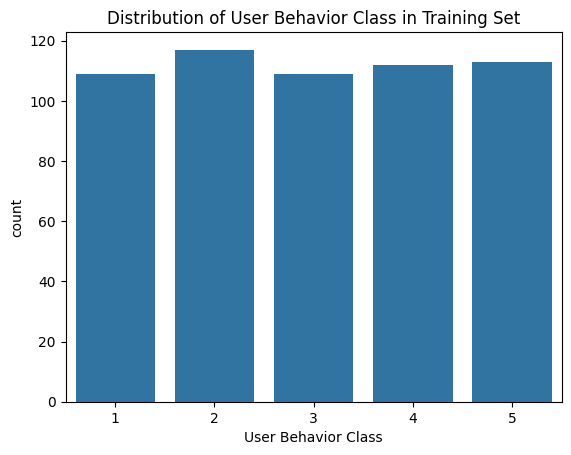

In [13]:
# 2. Check class balance for User Behavior Class
sns.countplot(x=y_train)
plt.title("Distribution of User Behavior Class in Training Set")
plt.show()

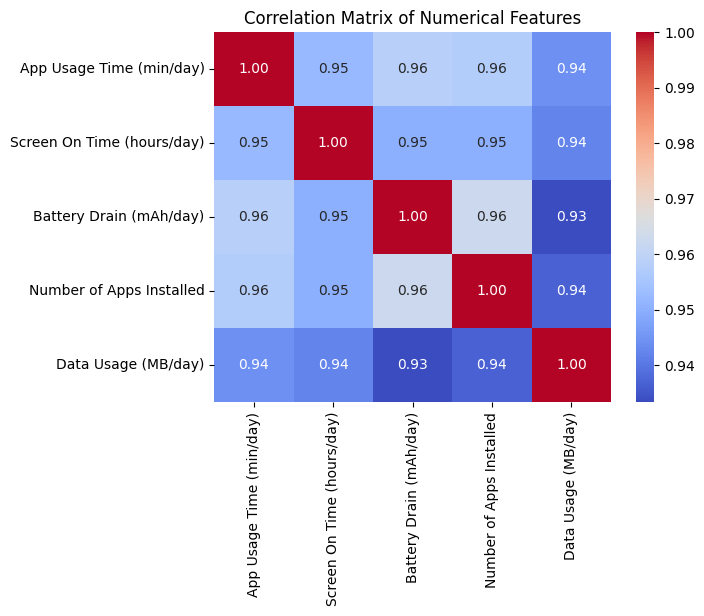

In [14]:
# 3. Feature Correlation Analysis
corr_matrix = X_train[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

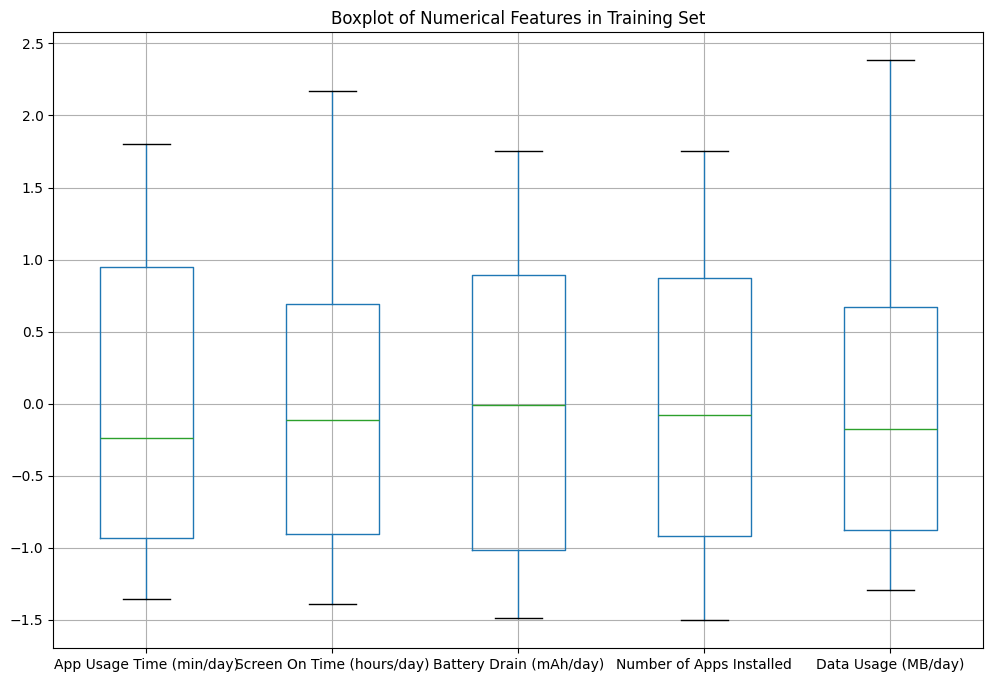

In [15]:
# 4. Outlier Detection (optional visualization for numerical features)
X_train[numerical_features].boxplot(figsize=(12, 8))
plt.title("Boxplot of Numerical Features in Training Set")
plt.show()

### **MODELLING**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [17]:
log_reg = LogisticRegression(C=0.1, max_iter=500)
log_reg.fit(X_train, y_train)


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1, max_iter=500)

In [18]:
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_preds = rf_clf.predict(X_test)

In [19]:

# Support Vector Machine
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_preds = svm_clf.predict(X_test)